## Objetivo: Classificar a chance de ocorrer um assalto de acordo com a localização, mês, dia do mês e dia da semana.

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/delitos_NY_2020/master/1%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/dados_processados.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana,grave
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday,1
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday,1
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday,1
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday,1
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday,1


## 2- Preparaçao dos dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138987 entries, 0 to 138986
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   138987 non-null  object 
 1   descricao_da_ofensa  138987 non-null  object 
 2   nivel_da_ofensa      138987 non-null  object 
 3   bairro               138987 non-null  object 
 4   idade_do_infrator    138987 non-null  object 
 5   sexo_do_infrator     138987 non-null  object 
 6   raca_do_infrator     138987 non-null  object 
 7   latitude             138987 non-null  float64
 8   longitude            138987 non-null  float64
 9   ano                  138987 non-null  int64  
 10  dia                  138987 non-null  int64  
 11  mes                  138987 non-null  int64  
 12  dia_da_semana        138987 non-null  object 
 13  grave                138987 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 14.8+ MB


 - Conventerndo a coluna data_da_ocorrencia para formato datetime

In [6]:
df["data_da_ocorrencia"] = pd.to_datetime(df["data_da_ocorrencia"] )

In [7]:
df.isna().sum()

data_da_ocorrencia     0
descricao_da_ofensa    0
nivel_da_ofensa        0
bairro                 0
idade_do_infrator      0
sexo_do_infrator       0
raca_do_infrator       0
latitude               0
longitude              0
ano                    0
dia                    0
mes                    0
dia_da_semana          0
grave                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138987 entries, 0 to 138986
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_da_ocorrencia   138987 non-null  datetime64[ns]
 1   descricao_da_ofensa  138987 non-null  object        
 2   nivel_da_ofensa      138987 non-null  object        
 3   bairro               138987 non-null  object        
 4   idade_do_infrator    138987 non-null  object        
 5   sexo_do_infrator     138987 non-null  object        
 6   raca_do_infrator     138987 non-null  object        
 7   latitude             138987 non-null  float64       
 8   longitude            138987 non-null  float64       
 9   ano                  138987 non-null  int64         
 10  dia                  138987 non-null  int64         
 11  mes                  138987 non-null  int64         
 12  dia_da_semana        138987 non-null  object        
 13  grave         

 - Excluindo colunas que não serão utilizadas e renomeando o dataset.

In [9]:
# como todos os registros correspondem ao ano de 2020, a coluna ano será exluída.
dados = df.drop(columns=['ano'])

In [10]:
dados.shape

(138987, 13)

 - Criando a coluna assalto

In [11]:
dados['assalto'] = dados['descricao_da_ofensa'].apply(lambda x: 1 if x=='ASSAULT 3 & RELATED OFFENSES' or x =='FELONY ASSAULT' else 0)

 ## Criando um filtro e pegando apenas os 15 delitos mais praticados

In [12]:
dados.descricao_da_ofensa.value_counts().head(15)

ASSAULT 3 & RELATED OFFENSES      23731
FELONY ASSAULT                    13475
PETIT LARCENY                     11406
DANGEROUS DRUGS                   11289
MISCELLANEOUS PENAL LAW            9133
ROBBERY                            7948
CRIMINAL MISCHIEF & RELATED OF     7831
DANGEROUS WEAPONS                  6710
GRAND LARCENY                      6542
BURGLARY                           6056
OFFENSES AGAINST PUBLIC ADMINI     4925
VEHICLE AND TRAFFIC LAWS           4589
OFF. AGNST PUB ORD SENSBLTY &      3061
SEX CRIMES                         2730
INTOXICATED & IMPAIRED DRIVING     2299
Name: descricao_da_ofensa, dtype: int64

In [13]:
dados.descricao_da_ofensa.value_counts().head(15).sum()

121725

In [14]:
lista_delitos_recorrentes = dict(dados.descricao_da_ofensa.value_counts().head(15))
lista_delitos_recorrentes = list(lista_delitos_recorrentes.keys())

In [15]:
dados = dados.set_index('descricao_da_ofensa')

In [16]:
dados = dados.loc[lista_delitos_recorrentes]

In [17]:
dados.assalto.value_counts()

0    84519
1    37206
Name: assalto, dtype: int64

In [18]:
dados = dados.reset_index()

In [19]:
dados.head()

,descricao_da_ofensa,data_da_ocorrencia,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,dia,mes,dia_da_semana,grave,assalto
0,ASSAULT 3 & RELATED OFFENSES,2020-10-20,contravencao,Bronx,18-24,M,BLACK,40.822298,-73.911694,20,10,Tuesday,0,1
1,ASSAULT 3 & RELATED OFFENSES,2020-10-15,contravencao,Queens,18-24,M,WHITE HISPANIC,40.697730,-73.845596,15,10,Thursday,0,1
2,ASSAULT 3 & RELATED OFFENSES,2020-09-30,contravencao,Manhattan,25-44,M,BLACK,40.800846,-73.949030,30,9,Wednesday,0,1
3,ASSAULT 3 & RELATED OFFENSES,2020-08-29,contravencao,Bronx,45-64,M,BLACK,40.838551,-73.909399,29,8,Saturday,0,1
4,ASSAULT 3 & RELATED OFFENSES,2020-08-09,contravencao,Bronx,45-64,F,BLACK,40.858584,-73.908696,9,8,Sunday,0,1


In [20]:
dados.shape

(121725, 14)

## 3- Visualização dos dados

In [21]:
dados.describe()

,latitude,longitude,dia,mes,grave,assalto
count,121725.000000,121725.000000,121725.000000,121725.000000,121725.000000,121725.000000
mean,40.738644,-73.922523,15.414763,6.235334,0.476122,0.305656
std,0.083337,0.077792,8.802742,3.656989,0.499432,0.460687
min,40.498905,-74.250149,1.000000,1.000000,0.000000,0.000000
25%,40.675976,-73.970198,8.000000,3.000000,0.000000,0.000000
50%,40.734677,-73.924054,15.000000,6.000000,0.000000,0.000000
75%,40.815606,-73.879998,23.000000,10.000000,1.000000,1.000000
max,40.912476,-73.700720,31.000000,12.000000,1.000000,1.000000


In [22]:
dados.corr().T

,latitude,longitude,dia,mes,grave,assalto
latitude,1.000000,0.280115,-0.002609,-0.003641,-0.070517,0.044708
longitude,0.280115,1.000000,0.005911,0.002924,0.001471,0.082315
dia,-0.002609,0.005911,1.000000,-0.004659,-0.000901,0.010673
mes,-0.003641,0.002924,-0.004659,1.000000,0.043483,0.033384
grave,-0.070517,0.001471,-0.000901,0.043483,1.000000,-0.151380
assalto,0.044708,0.082315,0.010673,0.033384,-0.151380,1.000000


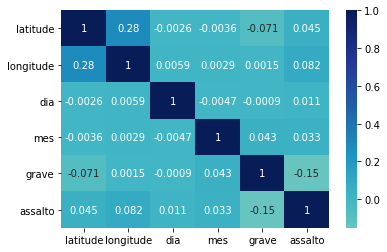

In [23]:
sns.heatmap(dados.corr(), annot=True, center=0, cmap="YlGnBu")

# 4 - Modelagem

## 4.1 Preparação dos Dados
- Separação Treino/Teste
- Separar Dados de Entrada (Atributos) e de saída (target)
- Tratar colunas categóricas
- Tratar dados ausentes


 - Convertendo variáveis categóricas em variáveis numéricas e definindo os dados de entrada e de saída.
 
      - No caso apenas as colunas que serão utilizadas na modelagem serão convertidas.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
enconder = LabelEncoder()

In [26]:
dados.columns

Index(['descricao_da_ofensa', 'data_da_ocorrencia', 'nivel_da_ofensa',
       'bairro', 'idade_do_infrator', 'sexo_do_infrator', 'raca_do_infrator',
       'latitude', 'longitude', 'dia', 'mes', 'dia_da_semana', 'grave',
       'assalto'],
      dtype='object')

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121725 entries, 0 to 121724
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   descricao_da_ofensa  121725 non-null  object        
 1   data_da_ocorrencia   121725 non-null  datetime64[ns]
 2   nivel_da_ofensa      121725 non-null  object        
 3   bairro               121725 non-null  object        
 4   idade_do_infrator    121725 non-null  object        
 5   sexo_do_infrator     121725 non-null  object        
 6   raca_do_infrator     121725 non-null  object        
 7   latitude             121725 non-null  float64       
 8   longitude            121725 non-null  float64       
 9   dia                  121725 non-null  int64         
 10  mes                  121725 non-null  int64         
 11  dia_da_semana        121725 non-null  object        
 12  grave                121725 non-null  int64         
 13  assalto       

In [28]:
# dados['nivel_da_ofensa'] = enconder.fit_transform(dados['nivel_da_ofensa'])
# dados['idade_do_infrator'] = enconder.fit_transform(dados['idade_do_infrator'])
# dados['descricao_da_ofensa'] = enconder.fit_transform(dados['descricao_da_ofensa'])
# dados['sexo_do_infrator'] = enconder.fit_transform(dados['sexo_do_infrator'])
# dados['raca_do_infrator'] = enconder.fit_transform(dados['raca_do_infrator'])
# dados['dia'] = enconder.fit_transform(dados['dia'])
# dados['mes'] = enconder.fit_transform(dados['mes'])
# dados['latitude'] = enconder.fit_transform(dados['latitude'])
# dados['longitude'] = enconder.fit_transform(dados['longitude'])
# dados['data_da_ocorrencia'] = enconder.fit_transform(dados['data_da_ocorrencia'])

In [29]:
dados['bairro'] = enconder.fit_transform(dados['bairro'])
dados['dia_da_semana'] = enconder.fit_transform(dados['dia_da_semana'])
dados['latitude'] = enconder.fit_transform(dados['latitude'])
dados['longitude'] = enconder.fit_transform(dados['longitude'])

In [30]:
dados.head()

,descricao_da_ofensa,data_da_ocorrencia,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,dia,mes,dia_da_semana,grave,assalto
0,ASSAULT 3 & RELATED OFFENSES,2020-10-20,contravencao,0,18-24,M,BLACK,22898,15376,20,10,5,0,1
1,ASSAULT 3 & RELATED OFFENSES,2020-10-15,contravencao,3,18-24,M,WHITE HISPANIC,12263,23331,15,10,4,0,1
2,ASSAULT 3 & RELATED OFFENSES,2020-09-30,contravencao,2,25-44,M,BLACK,21204,9345,30,9,6,0,1
3,ASSAULT 3 & RELATED OFFENSES,2020-08-29,contravencao,0,45-64,M,BLACK,24581,15773,29,8,2,0,1
4,ASSAULT 3 & RELATED OFFENSES,2020-08-09,contravencao,0,45-64,F,BLACK,26378,15895,9,8,3,0,1


Separando as variaveis em X e Y

In [31]:
X = dados[['latitude', 'longitude','bairro','dia', 'mes', 'dia_da_semana']]
Y = dados['assalto']

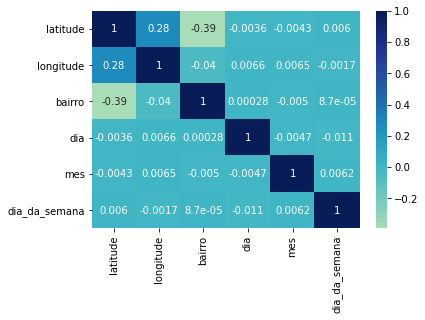

In [32]:
sns.heatmap(X.corr(), annot=True, center=0, cmap="YlGnBu")


Separando em amostras de treino e teste

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=123 , stratify = Y)

 - Criando um Benchmark

In [35]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 69.43%


Text(33.0, 0.5, 'Real ( 1 ou 0)')

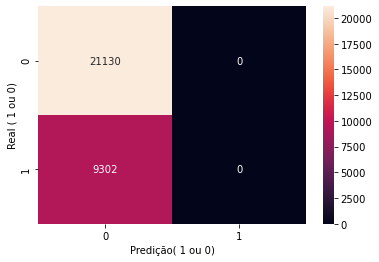

In [36]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [37]:
from sklearn.metrics import roc_auc_score

y_proba = dummy_clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

0.5

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     21130
           1       0.00      0.00      0.00      9302

    accuracy                           0.69     30432
   macro avg       0.35      0.50      0.41     30432
weighted avg       0.48      0.69      0.57     30432



C:\Users\Biena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 - Fazendo uma triagem com outros modelos

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [40]:
lista_classificacores = [ LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)

  print('Acuracia')
  train_acc = clf.score(X_treino, Y_treino)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Acuracia
Treino: 0.6942920048634617
Teste: 0.6942691903259727
ROC AUC
Treino 0.538993623336976
Test 0.5336908778910906
DecisionTreeClassifier
Acuracia
Treino: 0.9493937103611448
Teste: 0.6841482649842271
ROC AUC
Treino 0.993198082187678
Test 0.6337027195857203
RandomForestClassifier
Acuracia
Treino: 0.9493827566187988
Teste: 0.7119479495268138
ROC AUC
Treino 0.9907498635057149
Test 0.7061977191089998
XGBClassifier


C:\Users\Biena\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acuracia
Treino: 0.7296397314142377
Teste: 0.7009069400630915
ROC AUC
Treino 0.7593379465437742
Test 0.6705347373504499


In [41]:
modelo = RandomForestClassifier()

In [42]:
modelo.fit(X_treino, Y_treino)

RandomForestClassifier()

In [43]:
Y_previsto = modelo.predict(X_teste)

 - Gerando a matriz de confusão

Text(33.0, 0.5, 'Real ( 1 ou 0)')

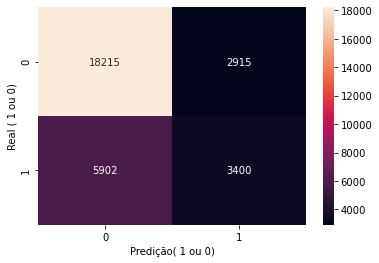

In [44]:
cm=confusion_matrix(Y_teste, Y_previsto)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [45]:
from sklearn.metrics import roc_auc_score

y_proba = clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

0.6705347373504499

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, Y_previsto))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     21130
           1       0.54      0.37      0.44      9302

    accuracy                           0.71     30432
   macro avg       0.65      0.61      0.62     30432
weighted avg       0.69      0.71      0.69     30432



# GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parametros = {'n_estimators' : np.arange(80,210,10),
#               'criterion' : ['gini','entropy'], 
#               'max_depth' : np.arange(2,6),
#               'min_samples_split' : np.arange(2,5),}
#               # 'max_features' : ['auto','sqrt','log2']}
# melhor_modelo = GridSearchCV(modelo, parametros, n_jobs=-1, cv=2, refit=True)

In [ ]:
parametros = {'max_depth' : np.arange(1,10),
              'criterion' : ['gini','entropy'],
              }

In [ ]:
melhor_modelo = GridSearchCV(modelo, parametros, n_jobs=-1 ,  cv=2 , refit = True)

In [ ]:
melhor_modelo.fit(x_treino, y_treino)

In [ ]:
melhor_modelo.best_estimator_

In [ ]:
modelo_final = melhor_modelo.best_estimator_

In [ ]:
modelo_final.fit(X_treino, Y_treino)

In [ ]:
Y_previsto = modelo_final.predict(X_teste)

In [ ]:
score_teste = modelo_final.score(X_teste,Y_teste)
score_teste

In [ ]:
cm=confusion_matrix(Y_teste, Y_previsto)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [ ]:
y_proba = clf.predict_proba(x_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, Y_previsto))

## Comparando roc_auc_score

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
#  antes cross_validate
roc_score = roc_auc_score(Y_teste, Y_pred)
print("ROC score = {:0.2f}%".format(roc_score*100))

In [ ]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_pred)

In [ ]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')